# Run DGE analysis on Stem cells using scanpy wilcoxon function
- also ran DGE using pseudobulk and DESeq2 approach

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import sys
import os
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

In [2]:
sc.logging.print_header()

/home/jovyan/my-conda-envs/scanpy_test/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jovyan/my-conda-envs/scanpy_test/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/jovyan/my-conda-envs/scanpy_test/lib/python3.8/site-packag

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.2 scikit-learn==1.2.2 statsmodels==0.14.0 pynndescent==0.5.10


/home/jovyan/my-conda-envs/scanpy_test/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [4]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.h5ad')

In [5]:
adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)

/tmp/ipykernel_1905/3216520572.py:1: DtypeWarning: Columns (3,5,6,8,9,11,12,14,62,63,64,65,66,67,70,72,73,75,78,82,83,84,86,88,91,92,93,94,95,100,101,102,103,106,107,109,110,112,113,114,118,120,121,122,123,124,125,126,127,128,130,131,133,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_compartments/Epi_SI_AP.pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230418.csv',index_col=0)


In [6]:
stem = adata[adata.obs.level_3_annot.isin(['Epithelial_stem'])].copy()

In [7]:
stem.obs['disease_simplified'] = (stem.obs["disease"].map(lambda x: {
 'control':'healthy',
 'neighbouring_inflammed':'neighbouring',
    'neighbouring_cancer':'neighbouring',
    'neighbouring_polyps':'neighbouring',
 'pediatric_IBD':'IBD',
 'crohns_disease':'IBD',
 'celiac_active':'celiac',
    'celiac_treated':'celiac'#only 1 cell
        
         }.get(x, x)).astype("category"))

In [8]:
ileum = stem[stem.obs.organ_unified.isin(['ileum'])].copy()

In [9]:
ileum = ileum[~ileum.obs.disease_simplified.isin(['neighbouring'])].copy()

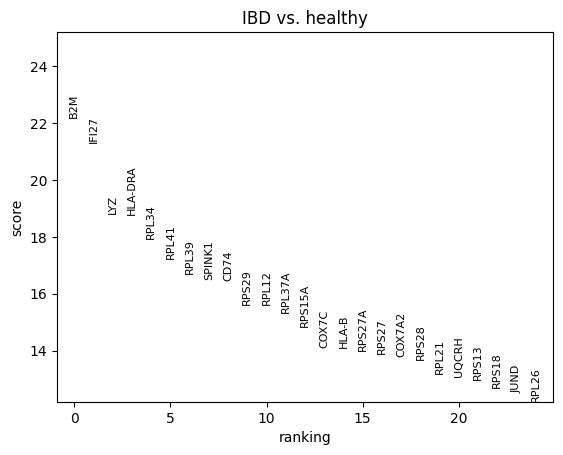

In [10]:
ileum.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(ileum,groupby='disease_simplified',groups=['IBD'], reference='healthy', method='wilcoxon',key_added = "wilcoxon")
sc.pl.rank_genes_groups(ileum, n_genes=25, sharey=False, key="wilcoxon")

In [11]:
#?gseapy.enrichr
glist = sc.get.rank_genes_groups_df(ileum, group='IBD', 
                                    key='wilcoxon', log2fc_min=0.25, 
                                    pval_cutoff=0.05)['names'].squeeze().str.strip().tolist()
print(len(glist))

156


In [12]:
glist

['B2M',
 'IFI27',
 'LYZ',
 'HLA-DRA',
 'RPL34',
 'RPL41',
 'RPL39',
 'SPINK1',
 'CD74',
 'RPS29',
 'RPL12',
 'RPL37A',
 'RPS15A',
 'COX7C',
 'HLA-B',
 'RPS27A',
 'RPS27',
 'COX7A2',
 'RPS28',
 'RPL21',
 'UQCRH',
 'RPS13',
 'RPS18',
 'JUND',
 'RPL26',
 'RPL31',
 'RPS19',
 'RPL35',
 'RPS14',
 'HLA-DRB1',
 'TOMM7',
 'EGR1',
 'RPS26',
 'RPLP2',
 'TMSB4X',
 'ZFAS1',
 'NDUFB1',
 'FOS',
 'RPL36',
 'PIGR',
 'RPS20',
 'RPS23',
 'PTMA',
 'REG1A',
 'RPLP1',
 'RPL10A',
 'RPL35A',
 'AGR2',
 'TXN',
 'RPL37',
 'KLF6',
 'RPS10',
 'RPL22',
 'RPL38',
 'COMMD6',
 'SNHG8',
 'UQCRQ',
 'UQCRB',
 'LCN2',
 'NDUFA4',
 'UBA52',
 'SOX4',
 'FAU',
 'COX6B1',
 'H3F3A',
 'RPL32',
 'S100A6',
 'RPL7',
 'RPS15',
 'HLA-DPB1',
 'OLFM4',
 'PABPC1',
 'ATF3',
 'HLA-DRB5',
 'HLA-DPA1',
 'RPS2',
 'COX7B',
 'RPS12',
 'RPS5',
 'HES1',
 'MTRNR2L10',
 'RPS4X',
 'BTG2',
 'RPL13A',
 'RPL27',
 'UBB',
 'RPL27A',
 'DMBT1',
 'RPL9',
 'HLA-E',
 'RPL23A',
 'RPS25',
 'RPL36A',
 'HLA-A',
 'NCOA7',
 'EEF1D',
 'DUSP1',
 'MTRNR2L6',
 'FOSB',


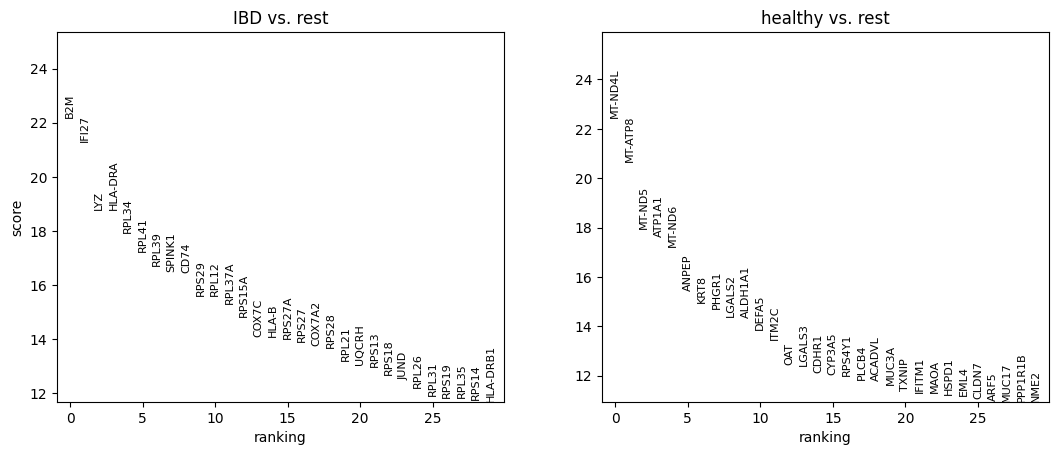

In [13]:
sc.tl.rank_genes_groups(ileum,groupby='disease_simplified',method='wilcoxon',key_added = "wilcoxon")
sc.pl.rank_genes_groups(ileum, n_genes=30, sharey=False, key="wilcoxon")

/home/jovyan/my-conda-envs/scanpy_test/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


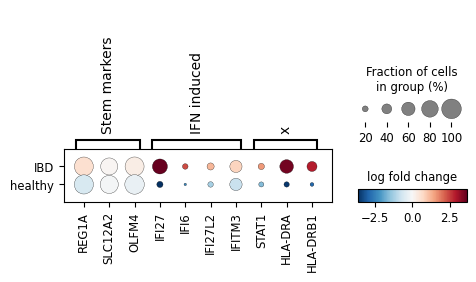

In [14]:
var_names = {'Stem markers': ['REG1A','SLC12A2','OLFM4'],
              'IFN induced': ['IFI27','IFI6','IFI27L2','IFITM3'],
            'x':['STAT1','HLA-DRA','HLA-DRB1']}

sc.pl.rank_genes_groups_dotplot(ileum,var_names=var_names,values_to_plot='logfoldchanges',cmap='RdBu_r',key="wilcoxon",save='dotplot_lfc_ileum_stem_DEGhealthyvsIBD.pdf')